<a href="https://colab.research.google.com/github/Piyush-1806/EconoPhysics/blob/main/Nifty50Analysis26_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload a file
uploaded = files.upload()

# Optional: Load the uploaded file into a DataFrame if it's a CSV
import pandas as pd
file_name = list(uploaded.keys())[0]
data = pd.read_csv(file_name)

# Display the first few rows of the DataFrame
data.head()


Saving Nifty50_Historical_Data_Cleaned (1).csv to Nifty50_Historical_Data_Cleaned (1).csv


,Date,Adj Close,Close,High,Low,Open,Volume
0,2020-01-01 00:00:00+00:00,12182.50000,12182.50000,12222.20020,12165.29980,12202.15039,304100
1,2020-01-02 00:00:00+00:00,12282.20020,12282.20020,12289.90039,12195.25000,12198.54980,407700
2,2020-01-03 00:00:00+00:00,12226.65039,12226.65039,12265.59961,12191.34961,12261.09961,428800
3,2020-01-06 00:00:00+00:00,11993.04980,11993.04980,12179.09961,11974.20020,12170.59961,396500
4,2020-01-07 00:00:00+00:00,12052.95020,12052.95020,12152.15039,12005.34961,12079.09961,447800


In [ ]:
import pandas as pd

# Load the data
file_path = '/content/Nifty50_Historical_Data_Cleaned (1).csv'  # Make sure to upload the file in Google Colab before running this
data = pd.read_csv(file_path)  # Skipping the first two rows that seem to be headers

# Parse the 'Date' column as datetime
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the dataframe to check
print(data.head())


                       Date    Adj Close        Close         High  \
0 2020-01-01 00:00:00+00:00  12182.50000  12182.50000  12222.20020   
1 2020-01-02 00:00:00+00:00  12282.20020  12282.20020  12289.90039   
2 2020-01-03 00:00:00+00:00  12226.65039  12226.65039  12265.59961   
3 2020-01-06 00:00:00+00:00  11993.04980  11993.04980  12179.09961   
4 2020-01-07 00:00:00+00:00  12052.95020  12052.95020  12152.15039   

           Low         Open  Volume  
0  12165.29980  12202.15039  304100  
1  12195.25000  12198.54980  407700  
2  12191.34961  12261.09961  428800  
3  11974.20020  12170.59961  396500  
4  12005.34961  12079.09961  447800  


In [ ]:
import pandas as pd

# Load the CSV file, skipping rows 2 and 3
file_path = '/content/Nifty50_Historical_Data_Cleaned (1).csv'
data = pd.read_csv(file_path)

# Reset the index and save the cleaned data back to the file or a new file
data.reset_index(drop=True, inplace=True)
data.to_csv('/content/Nifty50_Historical_Data_Cleaned (1).csv', index=False)

# Display the first few rows to verify
print(data.head())


                        Date    Adj Close        Close         High  \
0  2020-01-01 00:00:00+00:00  12182.50000  12182.50000  12222.20020   
1  2020-01-02 00:00:00+00:00  12282.20020  12282.20020  12289.90039   
2  2020-01-03 00:00:00+00:00  12226.65039  12226.65039  12265.59961   
3  2020-01-06 00:00:00+00:00  11993.04980  11993.04980  12179.09961   
4  2020-01-07 00:00:00+00:00  12052.95020  12052.95020  12152.15039   

           Low         Open  Volume  
0  12165.29980  12202.15039  304100  
1  12195.25000  12198.54980  407700  
2  12191.34961  12261.09961  428800  
3  11974.20020  12170.59961  396500  
4  12005.34961  12079.09961  447800  


In [ ]:
import numpy as np

# Calculate the Moving Average Convergence Divergence (MACD)
data['EMA12'] = data['Close'].ewm(span=12, adjust=False).mean()
data['EMA26'] = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = data['EMA12'] - data['EMA26']
data['Signal'] = data['MACD'].ewm(span=9, adjust=False).mean()

# Calculate the Relative Strength Index (RSI)
delta = data['Close'].diff()
gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
rs = gain / loss
data['RSI'] = 100 - (100 / (1 + rs))

# Display the new columns
print(data[['MACD', 'Signal', 'RSI']].head())


        MACD    Signal  RSI
0   0.000000  0.000000  NaN
1   7.953292  1.590658  NaN
2   9.662545  3.205036  NaN
3  -7.743217  1.015385  NaN
4 -16.513589 -2.490410  NaN


In [ ]:
# Additional features like the percentage change
data['Pct_change'] = data['Close'].pct_change()

# Volatility (standard deviation of daily returns over 10 days)
data['Volatility'] = data['Pct_change'].rolling(window=10).std()

# Display the new features
print(data[['Pct_change', 'Volatility']].head())


   Pct_change  Volatility
0         NaN         NaN
1    0.008184         NaN
2   -0.004523         NaN
3   -0.019106         NaN
4    0.004995         NaN


In [ ]:
# Define a crash as a drop over 3% in 5 days
data['Crash'] = data['Pct_change'].rolling(window=5).sum().apply(lambda x: 1 if x <= -0.03 else 0)

# Define a bounce back as a rise over 3% in 5 days
data['Bounce_back'] = data['Pct_change'].rolling(window=5).sum().apply(lambda x: 1 if x >= 0.03 else 0)

# Display labels
print(data[['Crash', 'Bounce_back']].tail())


      Crash  Bounce_back
1188      0            0
1189      0            0
1190      0            0
1191      0            0
1192      0            0


In [ ]:
from sklearn.model_selection import train_test_split

# Features and labels
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 'RSI', 'MACD', 'Signal', 'Volatility']]
y = data['Crash']  # Change to 'Bounce_back' for the other model

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the split data
print(X_train.shape, X_test.shape)


(954, 9) (239, 9)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Model initialization and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train.fillna(0), y_train)  # Handling missing values by filling with zero

# Predictions and evaluation
y_pred = model.predict(X_test.fillna(0))
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       220
           1       0.79      0.58      0.67        19

    accuracy                           0.95       239
   macro avg       0.88      0.78      0.82       239
weighted avg       0.95      0.95      0.95       239



In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load and preprocess data
data = pd.read_csv(file_path, skiprows=[1, 2])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate percentage change for 5-day future return
data['5_day_future_close'] = data['Close'].shift(-5)
data['5_day_return'] = (data['5_day_future_close'] - data['Close']) / data['Close']

# Create a binary classification for 'crash' if 5-day return is less than -3%
data['5_day_crash'] = (data['5_day_return'] <= -0.03).astype(int)

# Features and targets
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
targets = data['5_day_crash'].values

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Create sequences for LSTM
def create_sequences(features, targets, time_steps=30):
    X, y = [], []
    for i in range(len(features) - time_steps):
        v = features[i:(i + time_steps)]
        X.append(v)
        y.append(targets[i + time_steps])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_features, targets)


In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Building the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - accuracy: 0.9283 - loss: 0.4140 - val_accuracy: 0.9227 - val_loss: 0.2802
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9362 - loss: 0.2510 - val_accuracy: 0.9227 - val_loss: 0.2724
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9432 - loss: 0.2213 - val_accuracy: 0.9227 - val_loss: 0.2750
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9238 - loss: 0.2695 - val_accuracy: 0.9227 - val_loss: 0.2732
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9127 - loss: 0.2941 - val_accuracy: 0.9227 - val_loss: 0.2769
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9243 - loss: 0.2682 - val_accuracy: 0.9227 - val_loss: 0.2732
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9233 - loss: 0.2717 - val_accuracy: 0.9227 - val_loss: 0.2735
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9376 - loss: 0.2307 - val_accuracy: 0.9227 - v

In [ ]:
# Evaluating the model
model.evaluate(X_test, y_test, verbose=1)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9314 - loss: 0.2569


[0.25737062096595764, 0.9313304424285889]

In [ ]:
# Making predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Checking the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       215
           1       1.00      0.11      0.20        18

    accuracy                           0.93       233
   macro avg       0.97      0.56      0.58       233
weighted avg       0.94      0.93      0.91       233



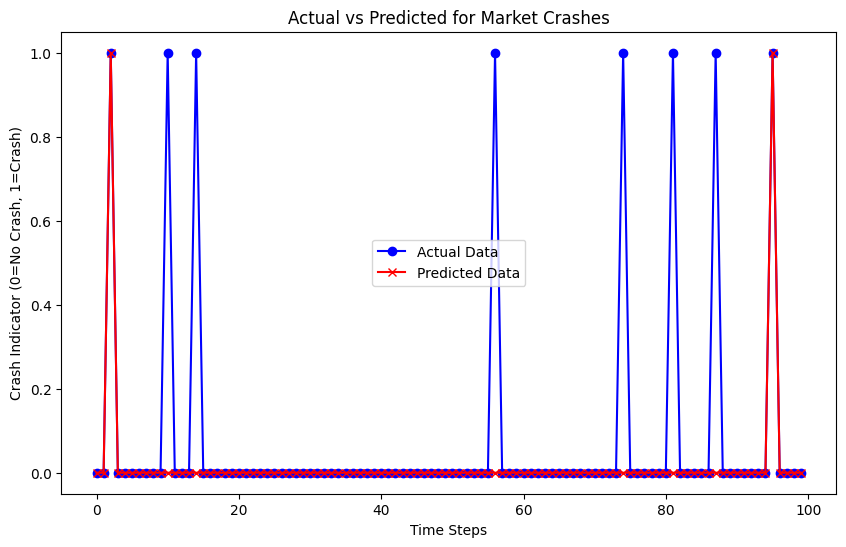

In [ ]:
import matplotlib.pyplot as plt

# Extract a part of the dataset for clear visualization
true_data = y_test[-100:]
predicted_data = predictions[-100:]

# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(true_data, label='Actual Data', color='blue', marker='o')
plt.plot(predicted_data, label='Predicted Data', color='red', marker='x')
plt.title('Actual vs Predicted for Market Crashes')
plt.xlabel('Time Steps')
plt.ylabel('Crash Indicator (0=No Crash, 1=Crash)')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - accuracy: 0.7357 - loss: 0.4892 - val_accuracy: 0.9356 - val_loss: 0.2471
Epoch 2/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9268 - loss: 0.2738 - val_accuracy: 0.9356 - val_loss: 0.2394
Epoch 3/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9311 - loss: 0.2459 - val_accuracy: 0.9356 - val_loss: 0.2391
Epoch 4/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9181 - loss: 0.2759 - val_accuracy: 0.9356 - val_loss: 0.2373
Epoch 5/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9223 - loss: 0.2809 - val_accuracy: 0.9356 - val_loss: 0.2423
Epoch 6/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9384 - loss: 0.2567 - val_accuracy: 0.9356 - val_loss: 0.2382
Epoch 7/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9263 - loss: 0.2622 - val_accuracy: 0.9356 - val_loss: 0.2389
Epoch 8/50
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9287 - loss: 0.2557 - val_accuracy: 0.9356 - v

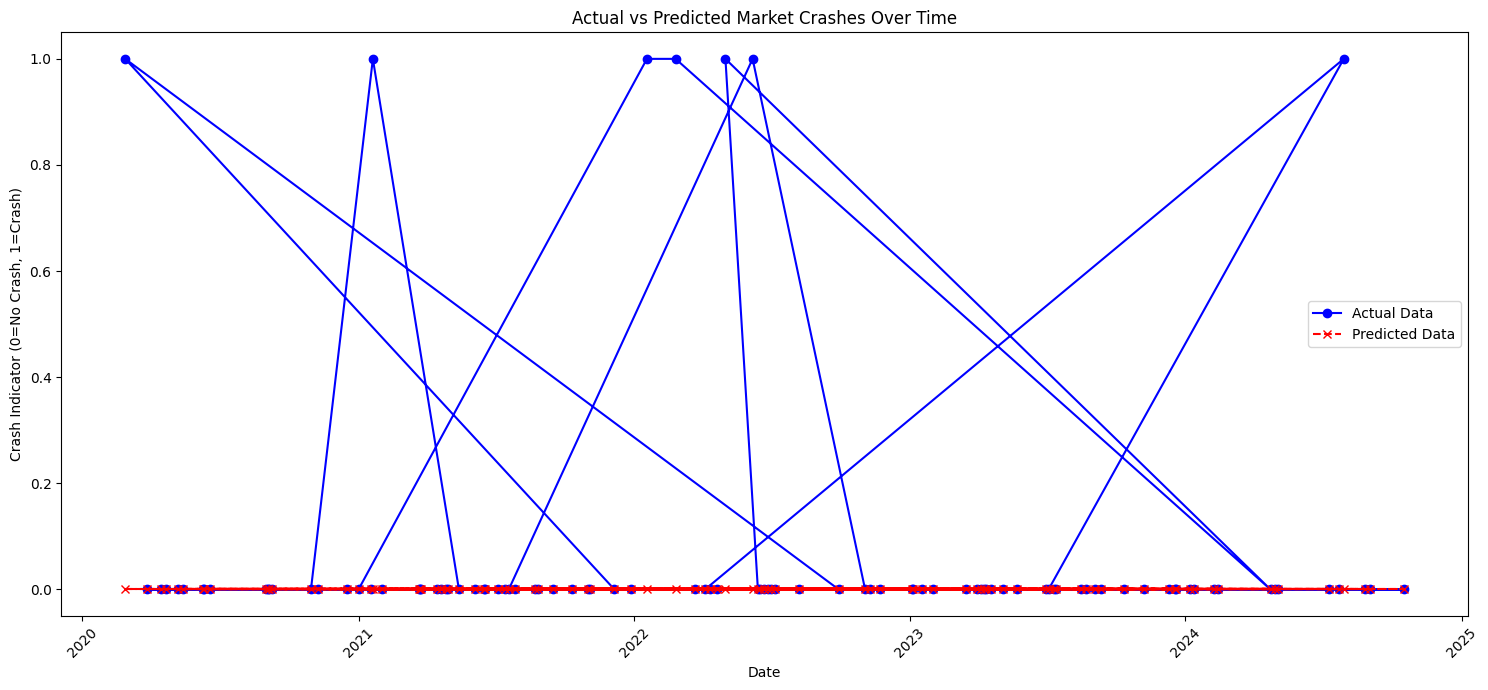

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Load and preprocess data
data = pd.read_csv('/content/Nifty50_Historical_Data_Cleaned (1).csv')  # Adjust file path as needed
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Calculate percentage change for 5-day future return
data['5_day_future_close'] = data['Close'].shift(-5)
data['5_day_return'] = (data['5_day_future_close'] - data['Close']) / data['Close']

# Create a binary classification for 'crash' if 5-day return is less than -3%
data['5_day_crash'] = (data['5_day_return'] <= -0.03).astype(int)

# Features and targets
features = data[['Open', 'High', 'Low', 'Close', 'Volume']].values
targets = data['5_day_crash'].values

# Scale features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_features = scaler.fit_transform(features)

# Creating sequences and keeping the dates
def create_sequences(features, targets, dates, time_steps=30):
    X, y, dates_seq = [], [], []
    for i in range(len(features) - time_steps):
        v = features[i:(i + time_steps)]
        X.append(v)
        y.append(targets[i + time_steps])
        dates_seq.append(dates[i + time_steps])
    return np.array(X), np.array(y), np.array(dates_seq)

X, y, dates_seq = create_sequences(scaled_features, targets, data.index)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test, dates_train, dates_test = train_test_split(X, y, dates_seq, test_size=0.2, random_state=42)

# Building the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50),
    Dropout(0.2),
    Dense(25),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Making predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Plotting the results with dates
plt.figure(figsize=(15, 7))
plt.plot(dates_test[-100:], y_test[-100:], label='Actual Data', marker='o', linestyle='-', color='blue')
plt.plot(dates_test[-100:], predictions[-100:], label='Predicted Data', marker='x', linestyle='--', color='red')
plt.title('Actual vs Predicted Market Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Crash Indicator (0=No Crash, 1=Crash)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()
